In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\Sai Anushka\Downloads/perrin-freres-monthly-champagne-.csv")

In [3]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
df.columns=["Month","sales"]
df.head()

,Month,sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [5]:
df.isnull().sum()

Month    1
sales    2
dtype: int64

In [6]:
df.tail()


,Month,sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [7]:
df.drop(106,axis=0,inplace=True)

In [8]:
df.drop(105,axis=0,inplace=True)

In [10]:
df.shape

(105, 2)

In [11]:
df["Month"]=pd.to_datetime(df["Month"])

In [13]:
df.set_index("Month",inplace=True)

In [14]:
df.head()

,sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [15]:
!pip install statsmodels

In [19]:
from statsmodels.tsa.stattools import adfuller

In [20]:
adfuller(df["sales"])

(-1.8335930563276237,
 0.3639157716602447,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [22]:
def adfuller_test(Sales):
    result=adfuller(Sales)
    
    labels=["ADF test statistics","p-value","Lags used","Number of obs used"]
    
    for value,label in zip(result,labels):
        print('{} : {}'.format(label,value))
    if result[1]<=0.05:
        print('Strong evidence against null hypo,reject the null hypo, & data is stationary')
    else:
        print('Weak evidence against null hypo,accept the null hypo, & data is not stationary')

In [23]:
adfuller_test(df['sales'])

ADF test statistics : -1.8335930563276237
p-value : 0.3639157716602447
Lags used : 11
Number of obs used : 93
Weak evidence against null hypo,accept the null hypo, & data is not stationary


In [24]:
df['sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: sales, Length: 105, dtype: float64

In [25]:
df["sales first diff."]=df['sales']-df['sales'].shift(1)

In [26]:
df.head()

,sales,sales first diff.
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0


In [27]:
df["seasonal first diff."]=df['sales']-df['sales'].shift(12)

In [28]:
df.head()

,sales,sales first diff.,seasonal first diff.
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN


In [31]:
adfuller_test(df["seasonal first diff."].dropna())

ADF test statistics : -7.626619157213163
p-value : 2.060579696813685e-11
Lags used : 0
Number of obs used : 92
Strong evidence against null hypo,reject the null hypo, & data is stationary


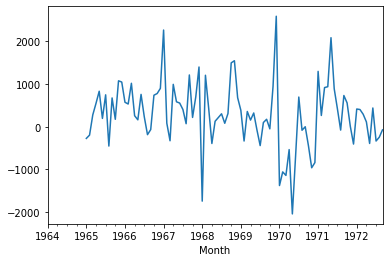

In [32]:
df["seasonal first diff."].plot()

In [36]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf


In [33]:
df.head(15)

,sales,sales first diff.,seasonal first diff.
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [37]:
import matplotlib.pyplot as plt

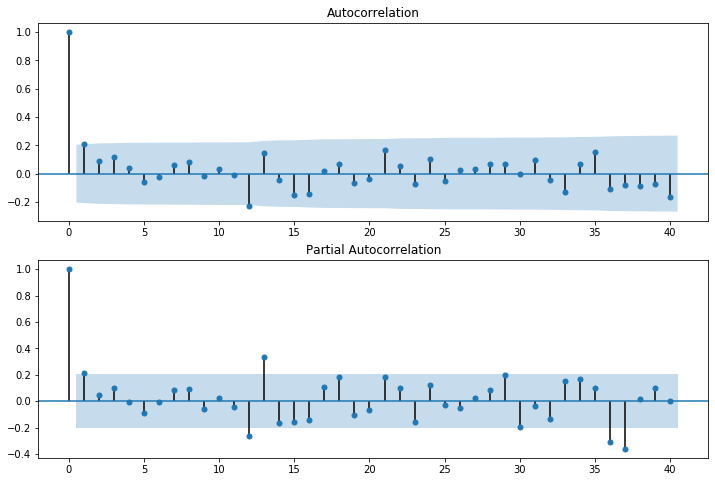

In [38]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=plot_acf(df['seasonal first diff.'].iloc[13:],lags=40,ax=ax1)

ax2=fig.add_subplot(212)
fig=plot_pacf(df['seasonal first diff.'].iloc[13:],lags=40,ax=ax2)



In [39]:
from statsmodels.tsa.arima_model import ARIMA

In [40]:
model=ARIMA(df['sales'],order=(1,1,1))

C:\Users\Sai Anushka\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Sai Anushka\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [41]:
model=model.fit()

In [42]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Sun, 20 Jun 2021   AIC                           1910.251
Time:                        20:26:28   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7822     12.405      1.836      0.069      -1.532      47.096
ar.L1.D.sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [43]:
df['forecast']=model.predict(start=90,end=103,dynamic=True)

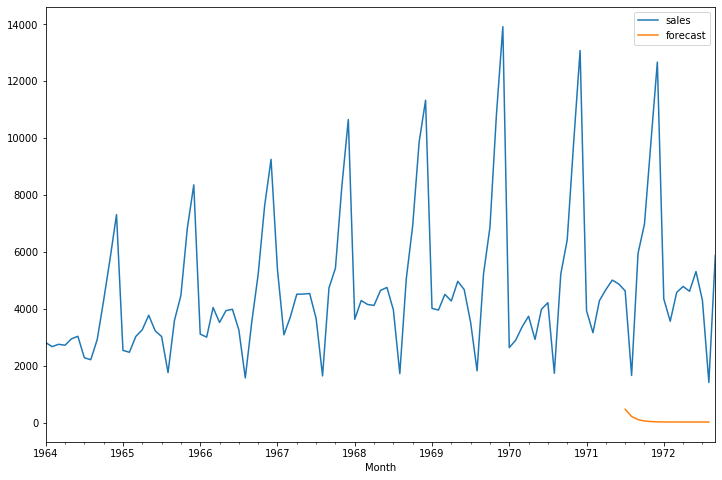

In [44]:
df[['sales','forecast']].plot(figsize=(12,8))

In [45]:
import statsmodels.api as sm

In [46]:
df['sales first diff.']=df['sales']-df['sales'].shift(1)

In [47]:
df.head()

,sales,sales first diff.,seasonal first diff.,forecast
Month,,,,
1964-01-01,2815.0,NaN,NaN,NaN
1964-02-01,2672.0,-143.0,NaN,NaN
1964-03-01,2755.0,83.0,NaN,NaN
1964-04-01,2721.0,-34.0,NaN,NaN
1964-05-01,2946.0,225.0,NaN,NaN


In [48]:
model=sm.tsa.statespace.SARIMAX(df['sales'],order=(1,1,1),seasonal_order=(1,1,1,12))

C:\Users\Sai Anushka\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [49]:
results=model.fit()

In [52]:
df['forecast_SARIMAX']=results.predict(start=90,end=103,dynamic=True)

In [53]:
df.tail(20)

,sales,sales first diff.,seasonal first diff.,forecast,forecast_SARIMAX
Month,,,,,
1971-02-01,3162.0,-772.0,263.0,NaN,NaN
1971-03-01,4286.0,1124.0,916.0,NaN,NaN
1971-04-01,4676.0,390.0,936.0,NaN,NaN
1971-05-01,5010.0,334.0,2083.0,NaN,NaN
1971-06-01,4874.0,-136.0,888.0,NaN,NaN
1971-07-01,4633.0,-241.0,416.0,473.012166,4437.325519
1971-08-01,1659.0,-2974.0,-79.0,218.337786,2050.747855
1971-09-01,5951.0,4292.0,730.0,107.720989,5493.376775
1971-10-01,6981.0,1030.0,557.0,59.675025,6752.038686


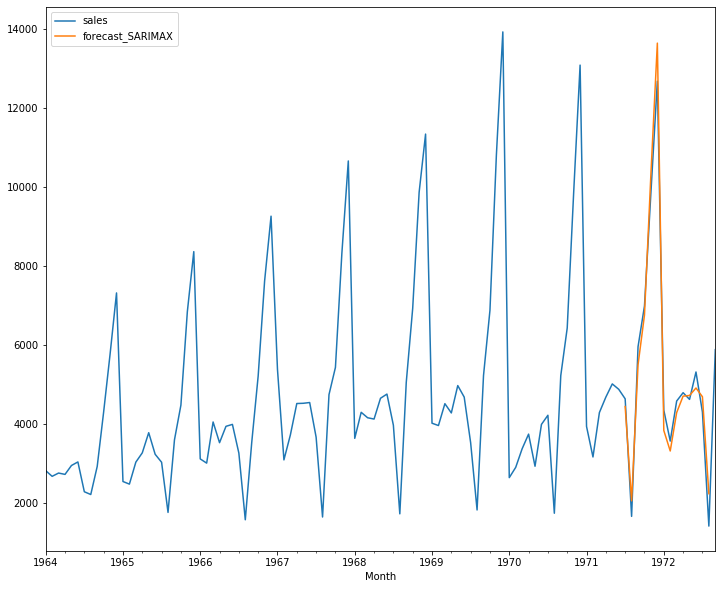

In [54]:
df[['sales','forecast_SARIMAX']].plot(figsize=(12,10))

In [55]:
from pandas.tseries.offsets import DateOffset

In [56]:
df.index[-1]

Timestamp('1972-09-01 00:00:00')

In [68]:
future_dates=[df.index[-1] + DateOffset(months=x)for x in range(0,24)]

In [69]:
future_dates[1:]

[Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00')]

In [70]:
future_dateset=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [73]:
future_dateset.tail()

,sales,sales first diff.,seasonal first diff.,forecast,forecast_SARIMAX
1974-04-01,NaN,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN,NaN


In [74]:
future_df=pd.concat([df,future_dateset])

In [75]:
future_df['forecast_SARIMAX2']=results.predict(start=104,end=124,dynamic=True)

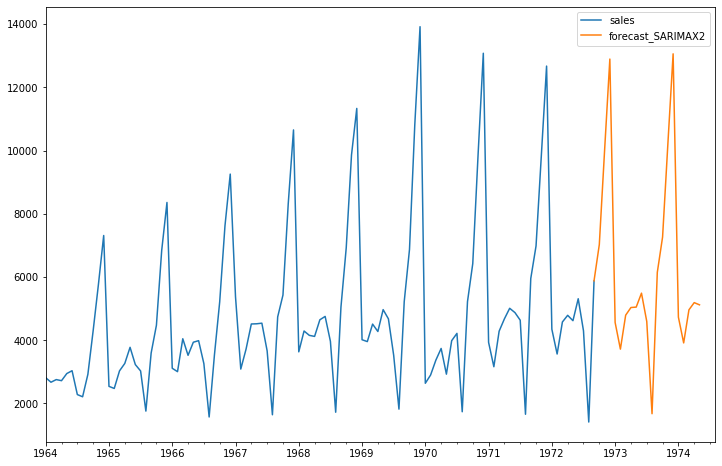

In [76]:
future_df[['sales','forecast_SARIMAX2']].plot(figsize=(12,8))